In [355]:
# import nessessary libraries

In [356]:
import pandas as pd 
import numpy as np

In [357]:
#load dataset

In [358]:
churn_data=pd.read_excel("C://Users//PAGALAVAN SELVAM//Downloads//customer_churn_large_dataset.xlsx")

In [359]:
churn_data.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0


In [360]:
#statistical description of a dataset

In [361]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   CustomerID                  100000 non-null  int64  
 1   Name                        100000 non-null  object 
 2   Age                         100000 non-null  int64  
 3   Gender                      100000 non-null  object 
 4   Location                    100000 non-null  object 
 5   Subscription_Length_Months  100000 non-null  int64  
 6   Monthly_Bill                100000 non-null  float64
 7   Total_Usage_GB              100000 non-null  int64  
 8   Churn                       100000 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 6.9+ MB


In [362]:
churn_data.describe()

,CustomerID,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,44.027020,12.490100,65.053197,274.393650,0.497790
std,28867.657797,15.280283,6.926461,20.230696,130.463063,0.499998
min,1.000000,18.000000,1.000000,30.000000,50.000000,0.000000
25%,25000.750000,31.000000,6.000000,47.540000,161.000000,0.000000
50%,50000.500000,44.000000,12.000000,65.010000,274.000000,0.000000
75%,75000.250000,57.000000,19.000000,82.640000,387.000000,1.000000
max,100000.000000,70.000000,24.000000,100.000000,500.000000,1.000000


In [363]:
churn_data['Location'].value_counts()

Houston        20157
Los Angeles    20041
Miami          20031
Chicago        19958
New York       19813
Name: Location, dtype: int64

In [364]:
#one-hot_encoding

In [365]:
gen = pd.get_dummies(churn_data['Gender'],prefix='gender',drop_first=True)
churn_data=pd.concat([churn_data,gen],axis=1)

In [366]:
loc = pd.get_dummies(churn_data['Location'],prefix='loc',drop_first=True)
churn_data=pd.concat([churn_data,loc],axis=1)

In [367]:
churn_data=churn_data.drop(['CustomerID','Name','Gender',"Location"],1)

C:\Users\PAGALAVAN SELVAM\AppData\Local\Temp\ipykernel_22644\2587009009.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  churn_data=churn_data.drop(['CustomerID','Name','Gender',"Location"],1)


In [368]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Age                         100000 non-null  int64  
 1   Subscription_Length_Months  100000 non-null  int64  
 2   Monthly_Bill                100000 non-null  float64
 3   Total_Usage_GB              100000 non-null  int64  
 4   Churn                       100000 non-null  int64  
 5   gender_Male                 100000 non-null  uint8  
 6   loc_Houston                 100000 non-null  uint8  
 7   loc_Los Angeles             100000 non-null  uint8  
 8   loc_Miami                   100000 non-null  uint8  
 9   loc_New York                100000 non-null  uint8  
dtypes: float64(1), int64(4), uint8(5)
memory usage: 4.3 MB


In [369]:
df=churn_data[["Monthly_Bill","Total_Usage_GB",'Subscription_Length_Months',"Age"]]

In [370]:
std_df=(df-df.mean())/df.std()

In [371]:
churn_data=churn_data.drop(["Monthly_Bill","Total_Usage_GB",'Subscription_Length_Months','Age'],1)

C:\Users\PAGALAVAN SELVAM\AppData\Local\Temp\ipykernel_22644\630491082.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  churn_data=churn_data.drop(["Monthly_Bill","Total_Usage_GB",'Subscription_Length_Months','Age'],1)


In [372]:
churn_data=pd.concat([churn_data,std_df],axis=1)

In [373]:
churn_data.head()

,Churn,gender_Male,loc_Houston,loc_Los Angeles,loc_Miami,loc_New York,Monthly_Bill,Total_Usage_GB,Subscription_Length_Months,Age
0,0,1,0,1,0,0,0.410604,-0.294288,0.651112,1.241664
1,0,0,0,0,0,1,-0.805370,-0.784848,-1.658870,1.176220
2,0,0,0,1,0,0,1.009199,1.422674,-1.081375,-1.310645
3,1,0,0,0,1,0,1.625589,0.173278,-1.370122,-0.525319
4,0,0,0,0,1,0,-0.341718,-0.064337,0.939859,0.129119


In [374]:
churn=(sum(churn_data["Churn"])/len(churn_data["Churn"]))
churn

0.49779

In [375]:
X= churn_data.drop(['Churn'],axis=1)
y= churn_data['Churn']

In [376]:
y.head()

0    0
1    0
2    0
3    1
4    0
Name: Churn, dtype: int64

In [377]:
X.head()

,gender_Male,loc_Houston,loc_Los Angeles,loc_Miami,loc_New York,Monthly_Bill,Total_Usage_GB,Subscription_Length_Months,Age
0,1,0,1,0,0,0.410604,-0.294288,0.651112,1.241664
1,0,0,0,0,1,-0.805370,-0.784848,-1.658870,1.176220
2,0,0,1,0,0,1.009199,1.422674,-1.081375,-1.310645
3,0,0,0,1,0,1.625589,0.173278,-1.370122,-0.525319
4,0,0,0,1,0,-0.341718,-0.064337,0.939859,0.129119


In [378]:
import statsmodels.api as sm

In [379]:
from sklearn.model_selection import train_test_split

In [380]:
X=sm.add_constant(X)

In [381]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [382]:
X_train[:5]

,gender_Male,loc_Houston,loc_Los Angeles,loc_Miami,loc_New York,Monthly_Bill,Total_Usage_GB,Subscription_Length_Months,Age
76513,1,0,1,0,0,1.634981,1.483994,0.073616,-1.245201
60406,0,1,0,0,0,0.338436,0.832468,-1.514496,0.652670
27322,1,0,0,0,0,0.029500,1.169728,1.084233,-0.787094
53699,0,1,0,0,0,0.896994,-1.612668,-0.070758,1.110777
65412,0,0,0,0,1,-1.142976,-1.344393,-1.081375,1.699771


In [383]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((70000, 9), (30000, 9), (70000,), (30000,))

In [384]:
logml=sm.Logit(y_train,X_train)
logml.fit().summary()

Optimization terminated successfully.
         Current function value: 0.693083
         Iterations 3


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                70000
Model:                          Logit   Df Residuals:                    69991
Method:                           MLE   Df Model:                            8
Date:                Fri, 25 Aug 2023   Pseudo R-squ.:               8.989e-05
Time:                        20:07:01   Log-Likelihood:                -48516.
converged:                       True   LL-Null:                       -48520.
Covariance Type:            nonrobust   LLR p-value:                    0.3662
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
gender_Male                    0.0017      0.014      0.126      0.900      -0.025       0.029
loc_Houston                   -0.0302      0.018     -1.658      0.097      -0.066       0.006
loc_Los Angeles               -0.0152      0.018     -0.835      0.404      -0.051       0.020
loc_Miami                      0.0105      0.018      0.577      0.564      -0.025       0.046
loc_New York                   0.0242      0.018      1.324      0.185      -0.012       0.060
Monthly_Bill                  -0.0067      0.008     -0.890      0.373      -0.022       0.008
Total_Usage_GB                -0.0022      0.008     -0.296      0.767      -0.017       0.013
Subscription_Length_Months     0.0026      0.008      0.350      0.726      -0.012       0.017
Age                            0.0095      0.008      1.252      0.210      -0.005       0.024
==============================================================================================
"""

In [385]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<AxesSubplot:>

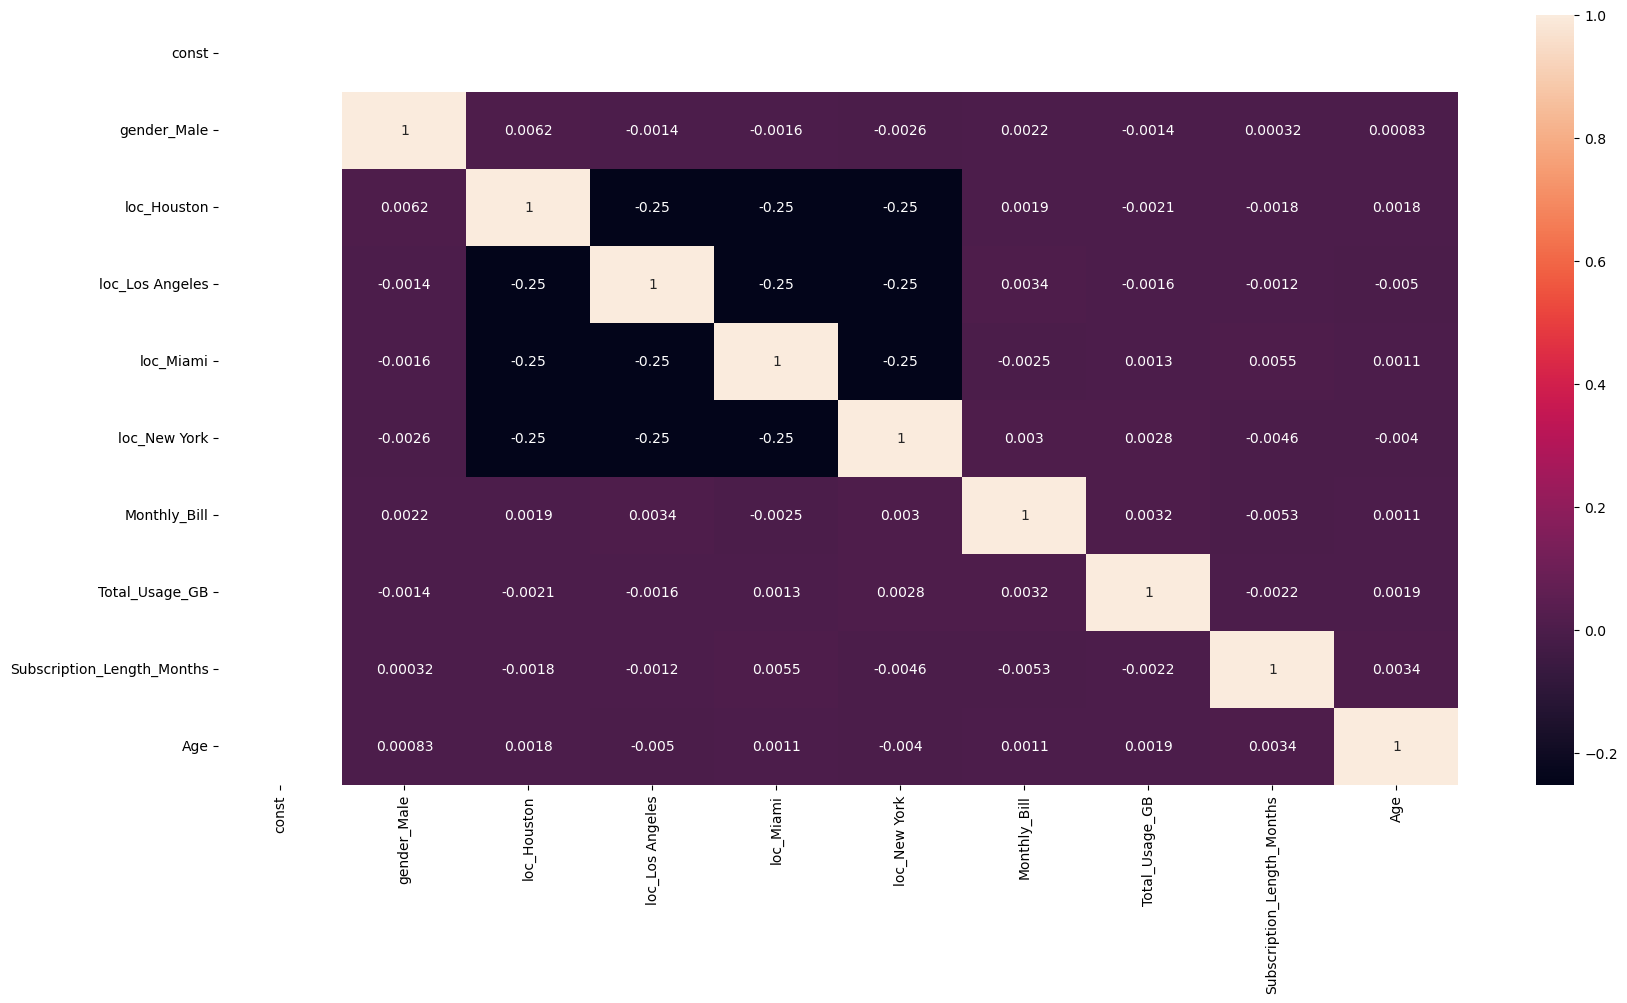

In [386]:
plt.figure(figsize=(20,10))
sns.heatmap(X.corr(),annot=True)

In [387]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['variables']=X.columns
vif['VIF']=[round(variance_inflation_factor(X.values,i),2) for i in range(X.shape[1])]

In [388]:
vif.sort_values(by="VIF")

,variables,VIF
1,gender_Male,1.0
6,Monthly_Bill,1.0
7,Total_Usage_GB,1.0
8,Subscription_Length_Months,1.0
9,Age,1.0
2,loc_Houston,1.6
3,loc_Los Angeles,1.6
4,loc_Miami,1.6
5,loc_New York,1.6
0,const,6.0


In [389]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   const                       100000 non-null  float64
 1   gender_Male                 100000 non-null  uint8  
 2   loc_Houston                 100000 non-null  uint8  
 3   loc_Los Angeles             100000 non-null  uint8  
 4   loc_Miami                   100000 non-null  uint8  
 5   loc_New York                100000 non-null  uint8  
 6   Monthly_Bill                100000 non-null  float64
 7   Total_Usage_GB              100000 non-null  float64
 8   Subscription_Length_Months  100000 non-null  float64
 9   Age                         100000 non-null  float64
dtypes: float64(5), uint8(5)
memory usage: 4.3 MB


In [390]:
X=sm.add_constant(X)
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
logm2=sm.Logit(y_train,X_train)
logm2.fit().summary()

Optimization terminated successfully.
         Current function value: 0.693083
         Iterations 3


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                70000
Model:                          Logit   Df Residuals:                    69991
Method:                           MLE   Df Model:                            8
Date:                Fri, 25 Aug 2023   Pseudo R-squ.:               8.989e-05
Time:                        20:07:03   Log-Likelihood:                -48516.
converged:                       True   LL-Null:                       -48520.
Covariance Type:            nonrobust   LLR p-value:                    0.3662
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
gender_Male                    0.0017      0.014      0.126      0.900      -0.025       0.029
loc_Houston                   -0.0302      0.018     -1.658      0.097      -0.066       0.006
loc_Los Angeles               -0.0152      0.018     -0.835      0.404      -0.051       0.020
loc_Miami                      0.0105      0.018      0.577      0.564      -0.025       0.046
loc_New York                   0.0242      0.018      1.324      0.185      -0.012       0.060
Monthly_Bill                  -0.0067      0.008     -0.890      0.373      -0.022       0.008
Total_Usage_GB                -0.0022      0.008     -0.296      0.767      -0.017       0.013
Subscription_Length_Months     0.0026      0.008      0.350      0.726      -0.012       0.017
Age                            0.0095      0.008      1.252      0.210      -0.005       0.024
==============================================================================================
"""

In [391]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

l2=LogisticRegression()
rfe=RFE(l2)
rfe=rfe.fit(X,y)

print(rfe.support_)
print(rfe.ranking_)

[False  True  True  True  True  True False False False False]
[3 1 1 1 1 1 6 2 4 5]


In [392]:
X.columns[(rfe.support_)]

Index(['gender_Male', 'loc_Houston', 'loc_Los Angeles', 'loc_Miami',
       'loc_New York'],
      dtype='object')

In [393]:
col=["gender_Male",'loc_Houston', 'loc_Los Angeles', 'loc_Miami', 'loc_New York']

In [394]:
logsl=LogisticRegression()
logsl.fit(X_train[col],y_train)

LogisticRegression()

In [395]:
logs2=sm.Logit(y_train,X_train[col])
logs2.fit().summary()

Optimization terminated successfully.
         Current function value: 0.693101
         Iterations 3


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                70000
Model:                          Logit   Df Residuals:                    69995
Method:                           MLE   Df Model:                            4
Date:                Fri, 25 Aug 2023   Pseudo R-squ.:               6.338e-05
Time:                        20:07:05   Log-Likelihood:                -48517.
converged:                       True   LL-Null:                       -48520.
Covariance Type:            nonrobust   LLR p-value:                    0.1882
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
gender_Male         0.0018      0.014      0.127      0.899      -0.025       0.029
loc_Houston        -0.0302      0.018     -1.658      0.097      -0.066       0.006
loc_Los Angeles    -0.0154      0.018     -0.847      0.397      -0.051       0.020
loc_Miami           0.0105      0.018      0.575      0.565      -0.025       0.046
loc_New York        0.0241      0.018      1.319      0.187      -0.012       0.060
===================================================================================
"""

In [396]:
y_pred=logsl.predict_proba(X_test[col])

y_pred_df =pd.DataFrame(y_pred)

y_pred_1=y_pred_df.iloc[:,[1]]
y_pred_1.head()

,1
0,0.491816
1,0.507113
2,0.495523
3,0.507113
4,0.495523


In [397]:
y_test_df=pd.DataFrame(y_test)

In [398]:
y_test_df["custId"]=y_test_df.index

In [399]:
y_pred_1.reset_index(drop=True,inplace=True)
y_test_df.reset_index(drop=True,inplace=True)

In [400]:
y_pred_final=pd.concat([y_test_df,y_pred_1],axis=1)

In [401]:
y_pred_final=y_pred_final.rename(columns={1:"Churn_prob"})

In [402]:
y_pred_final

,Churn,custId,Churn_prob
0,0,75721,0.491816
1,0,80184,0.507113
2,0,19864,0.495523
3,1,76699,0.507113
4,0,92991,0.495523
...,...,...,...
29995,1,42648,0.505412
29996,0,86306,0.491816
29997,1,45466,0.496159
29998,0,63724,0.497224


In [403]:
y_pred_final=y_pred_final.reindex(columns=["custId",'Churn',"Churn_prob"])

In [404]:
y_pred_final.head()

,custId,Churn,Churn_prob
0,75721,0,0.491816
1,80184,0,0.507113
2,19864,0,0.495523
3,76699,1,0.507113
4,92991,0,0.495523


In [405]:
y_pred_final['predicted']=y_pred_final.Churn_prob.map(lambda x:1 if x>0.5 else 0)

In [406]:
y_pred_final.head()

,custId,Churn,Churn_prob,predicted
0,75721,0,0.491816,0
1,80184,0,0.507113,1
2,19864,0,0.495523,0
3,76699,1,0.507113,1
4,92991,0,0.495523,0


In [407]:
from sklearn import metrics

In [408]:
confusion=metrics.confusion_matrix(y_pred_final.Churn,y_pred_final.predicted)

In [409]:
confusion

array([[9251, 5901],
       [8935, 5913]], dtype=int64)

In [410]:
metrics.accuracy_score(y_pred_final.Churn,y_pred_final.predicted)

0.5054666666666666